### **Title: Credit Card Fraud Detection**

### **Objective**: <font size="3">Create a machine learning model to detect fraudulent credit card transactions.</font>


### **About Dataset:** <font size="3"> This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.</font>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


### **Load Packages**

In [ ]:
# Import libararies

# For data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For filtering warnings
import warnings
warnings.simplefilter("ignore")

# For splitting the data
from sklearn.model_selection import train_test_split

# For data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb
import xgboost as xgb

# For model performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix,classification_report

In [ ]:
# Sets the maximum number of columns to display
pd.set_option('display.max_columns', 100)

In [ ]:
pip install -U kaleido #For exporting image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### **Reading the Data**

### **Training Data**

In [ ]:
# Load the training data
train_path = '/content/drive/MyDrive/Codsoft_projects/Creditcard_Fraud_Detection/Fraud_detetction_data/fraudTrain.csv'
train_data = pd.read_csv(train_path)

In [ ]:
print ("rows:",train_data.shape[0]," columns:", train_data.shape[1])

rows: 1296675  columns: 23


### **Test Data**

In [ ]:
# Load the test data
test_path = '/content/drive/MyDrive/Codsoft_projects/Creditcard_Fraud_Detection/Fraud_detetction_data/fraudTest.csv'
test_data = pd.read_csv(test_path)

In [ ]:
print ("rows:",test_data.shape[0]," columns:", test_data.shape[1])

rows: 555719  columns: 23


### **View the Data**

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
# Checking for missing data
# For training data
total = train_data.isnull().sum().sort_values(ascending = False)
total

Unnamed: 0               0
zip                      0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
state                    0
trans_date_trans_time    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
cc_num                   0
is_fraud                 0
dtype: int64

In [ ]:
# For test data
print(test_data.isnull().sum().sort_values(ascending = False))

Unnamed: 0               0
zip                      0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
state                    0
trans_date_trans_time    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
cc_num                   0
is_fraud                 0
dtype: int64


- There are no missing data in the dataset.

In [ ]:
# Checking for Duplicates
column_names = train_data.columns
print(train_data.duplicated(subset=column_names, keep=False).sum())

0


In [ ]:
column_names = test_data.columns
print(test_data.duplicated(subset=column_names, keep=False).sum())

0


In [ ]:
# Statistics on the amounts
train_data.amt.describe().round(2)

count    1296675.00
mean          70.35
std          160.32
min            1.00
25%            9.65
50%           47.52
75%           83.14
max        28948.90
Name: amt, dtype: float64

- It is possible to see that 75% of transactions were below €83.14 and the highest transaction amount was €28948.90, much higher than the average amount of €70.35.

In [ ]:
# Check for class imbalance
train_data.is_fraud.value_counts()/1296675*100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

In [ ]:
# Determine the number of fraud cases

fraud = train_data[train_data['is_fraud'] == 1]
not_fraud = train_data[train_data['is_fraud'] == 0]

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(not_fraud)))

Fraud Cases: 7506
Valid Cases: 1289169


- Only 7,506 (or 0.58%) of transaction are fraudulent. That means the data is highly unbalanced with respect to target variable "is_fraud".

###**Exploratory Data Analysis (EDA)**

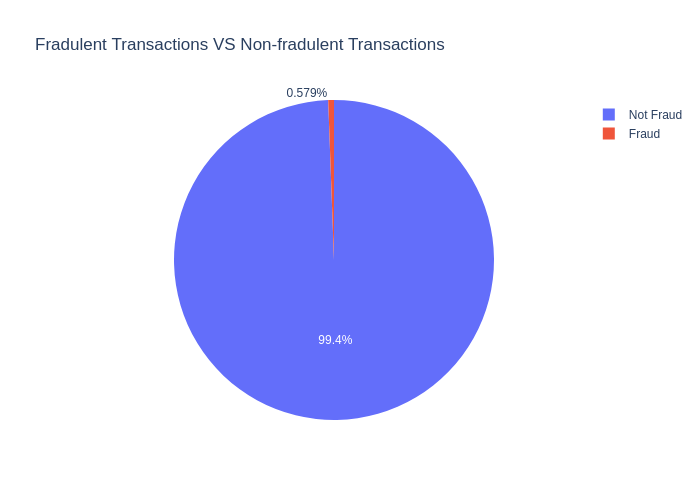

In [ ]:
# Visualizing Class distribution

fig = px.pie(train_data.is_fraud,values = train_data.is_fraud.value_counts(),
             names=['Not Fraud', 'Fraud'], title='Fradulent Transactions VS Non-fradulent Transactions')
fig.show("png")

- Only 0.579% of transaction are fraudulent whereas, 99.4% of transactions were Not fraud.

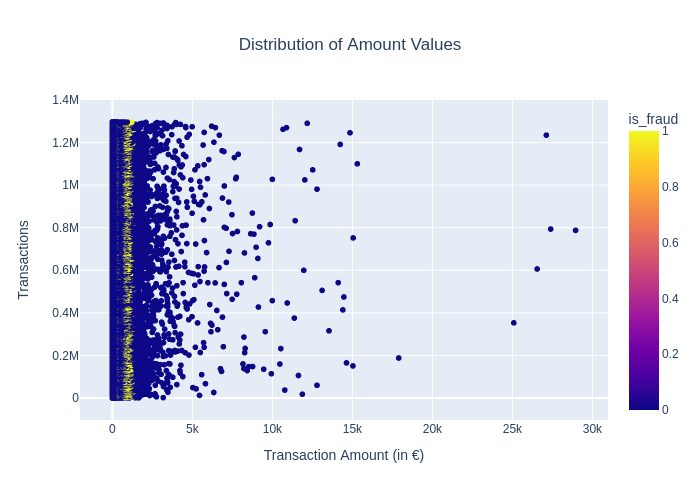

In [ ]:
# Distribution of Amount

fig = px.scatter(train_data, x='amt', y=train_data.index, color=train_data.is_fraud,
                 title='Distribution of Amount Values')
fig.update_layout(
    xaxis_title='Transaction Amount (in €)',
    yaxis_title='Transactions',
    title_x=0.5
)
fig.show('png')


- It looks like most transactions are genuine, represented by the blue dots. No apparent fraudulent transaction being made above €5,000.00.

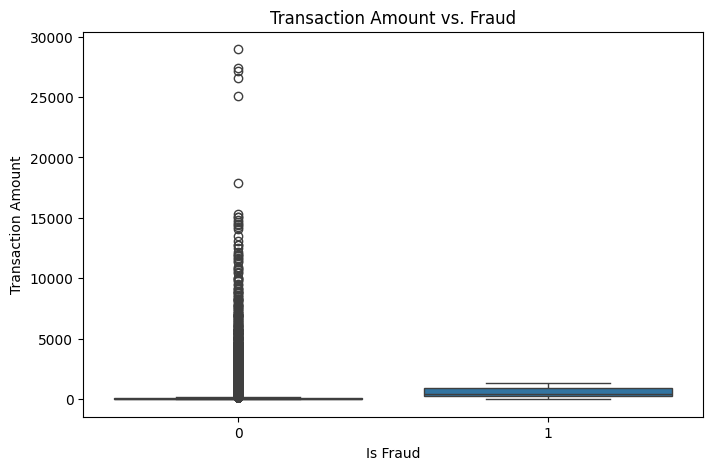

In [ ]:
# Distribution of transaction amounts by fraud status

plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


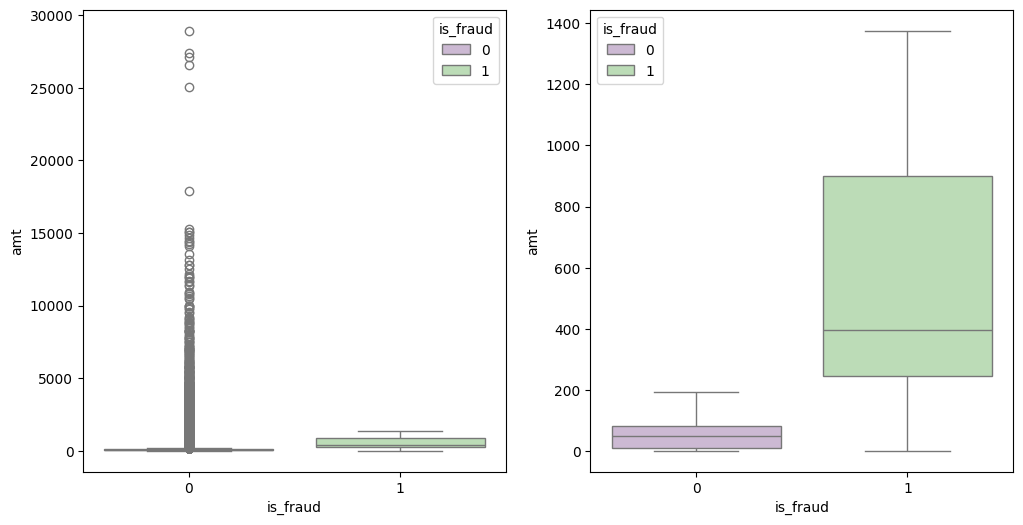

In [ ]:
# Transactions Amount

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="is_fraud", y="amt", hue="is_fraud",data=train_data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="is_fraud", y="amt", hue="is_fraud",data=train_data, palette="PRGn",showfliers=False)
plt.show()



- Real transactions have a larger mean, larger Q1 and outliers, and smaller Q3 and Q4. Fraudulent transactions, on the other hand, show a lower mean and Q1, a higher Q3, and smaller outliers.

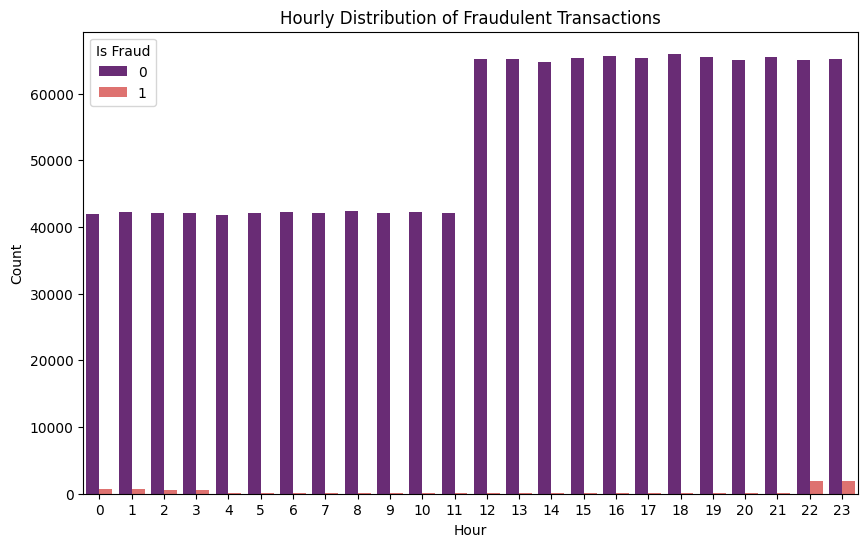

In [ ]:
# Time analysis: Extract hours and days from 'trans_date_trans_time'

train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['trans_day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_data,palette="magma")
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

- fraudulent transactions are less frequent than non-fraudulent transactions

- Fraudulent transactions have a distribution more even than non-fradulent transactions- are equaly distributed in time, including the low real transaction times, during night.

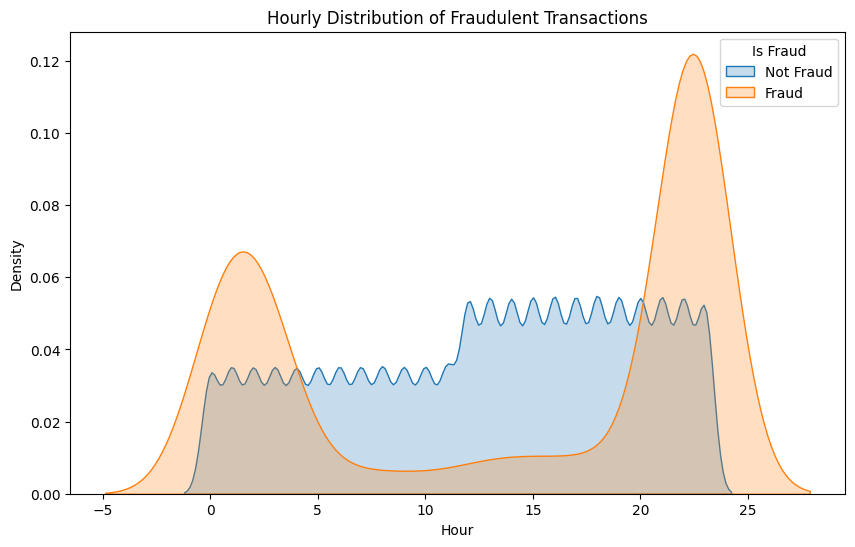

In [ ]:
# kde-plot for hourly distribution of fradulent transactions

plt.figure(figsize=(10, 6))

# Non-fraudulent transactions
sns.kdeplot(train_data[train_data['is_fraud'] == 0]['trans_hour'], label='Not Fraud', shade=True)

# Fraudulent transactions
sns.kdeplot(train_data[train_data['is_fraud'] == 1]['trans_hour'], label='Fraud', shade=True)

plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.legend(title='Is Fraud')
plt.show()


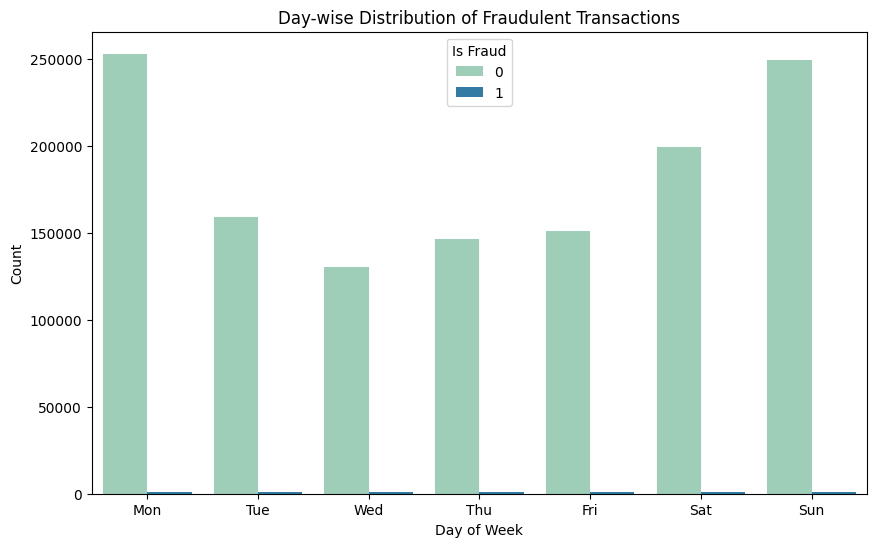

In [ ]:
# Day-wise distribution of fraud

plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_data,palette="YlGnBu")
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

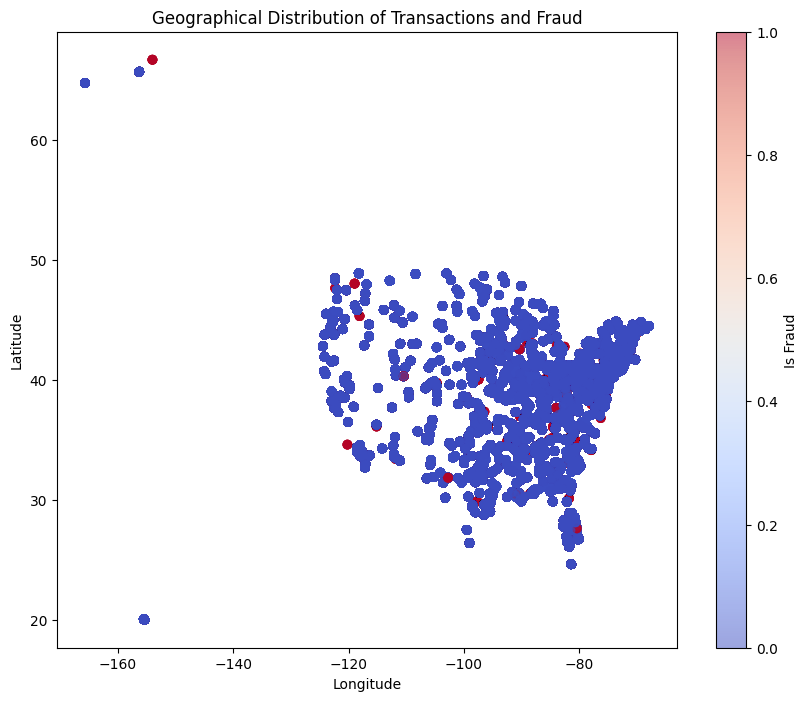

In [ ]:
# Plot of geographical data

plt.figure(figsize=(10, 8))
plt.scatter(train_data['long'], train_data['lat'], c=train_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [ ]:
train_data.query("is_fraud ==0").amt.describe()

count   1289169.000000
mean         67.667110
std         154.007971
min           1.000000
25%           9.610000
50%          47.280000
75%          82.540000
max       28948.900000
Name: amt, dtype: float64

- The highest Valid transaction amount was € 28,948.9.

In [ ]:
train_data.query("is_fraud ==1").amt.describe()

count   7506.000000
mean     531.320092
std      390.560070
min        1.060000
25%      245.662500
50%      396.505000
75%      900.875000
max     1376.040000
Name: amt, dtype: float64

- The highest fraud amount was €1,376.04, on average, fraudulent amounts costed around €531.32



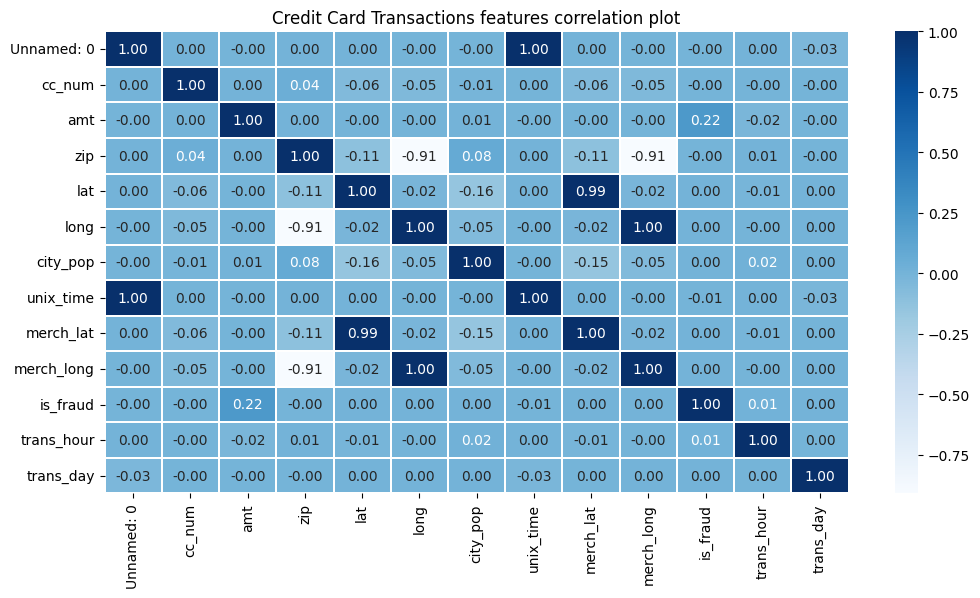

In [ ]:
# Feature Correlation

plt.figure(figsize = (12,6))
plt.title('Credit Card Transactions features correlation plot')
corr = train_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues",annot=True,fmt=".2f")
plt.show()

- While is no notable correlation between features.The feature 'zip' exhibits an inverse correlation with both 'long' and 'merch_long.' Additionally, 'lat' and 'merch_lat,' as well as 'long' and 'merch_long,' demonstrate positive correlations with each other.
- Negative values in the correlation matrix indicate an inverse correlation.
- Positive values in the correlation matrix indicate an direct correlation.

### **Exploring categorical features**

In [ ]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


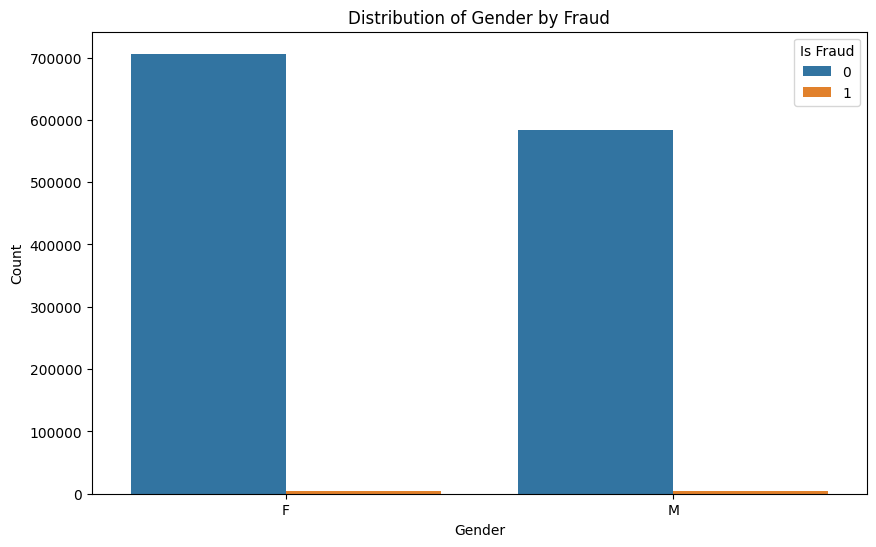

In [ ]:
# Gender

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

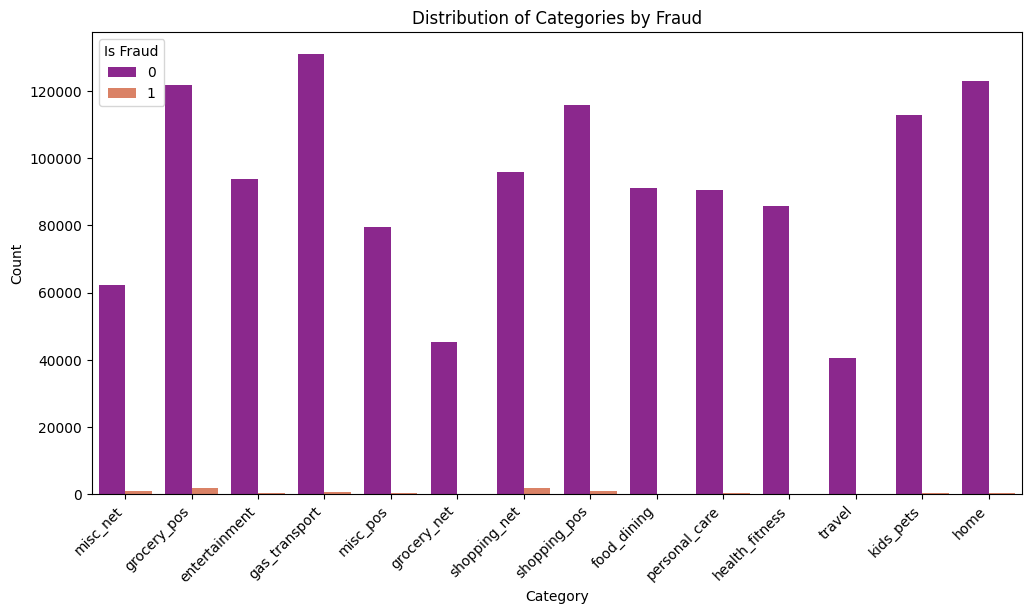

In [ ]:
# Category

plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data, palette='plasma')
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud',loc='upper left')
plt.show()


- Analyzing the distribution based on categories, fraudulent transactions were observed to occur on a smaller scale within categories such as "misc_net," "grocery_pros," "shopping_net," and "shopping_pos."

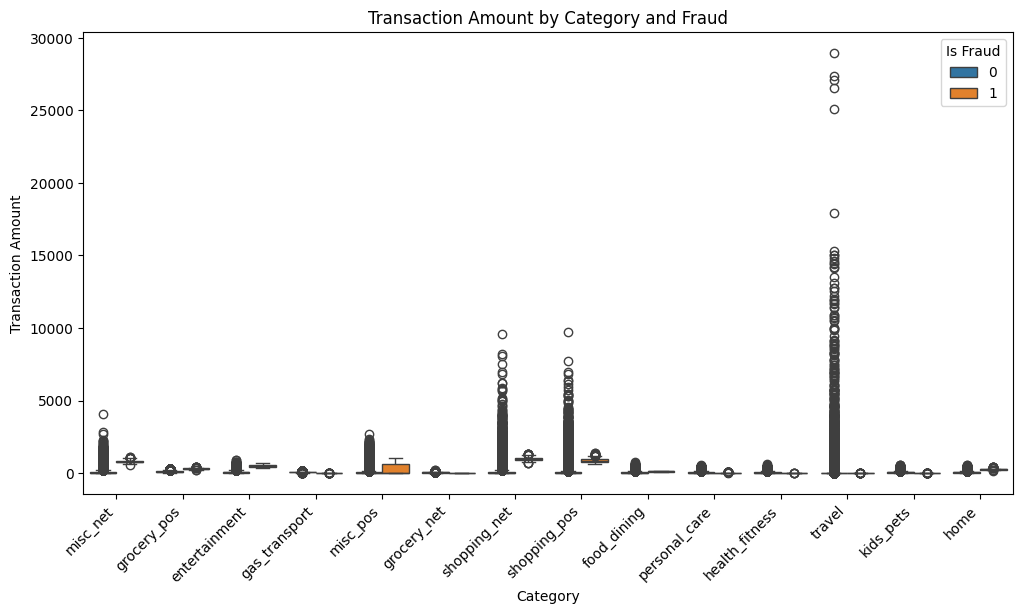

In [ ]:
# Transaction Amount by Category

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

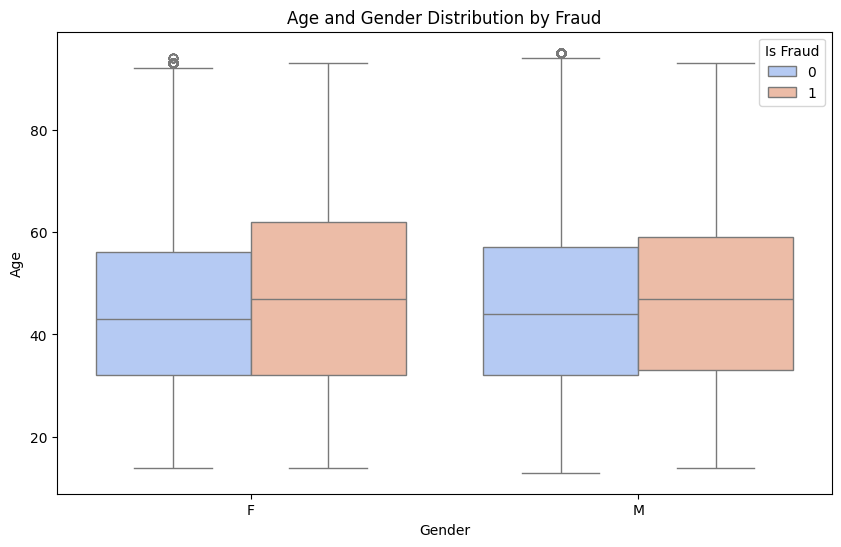

In [ ]:
# dob and gender
# Age and Gender Analysis

train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# Calculate age
train_data['age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days // 365

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data, palette="coolwarm")
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()


- The age distribution for the fraud transaction group is skewed to the left, which means that there are more people in the younger age range in this group. The age distribution for the non-fraud transaction group is more evenly distributed.

- The gender distribution for the fraud transaction group is skewed to the right, which means that there are more men in this group than women. The gender distribution for the non-fraud group is more evenly distributed.

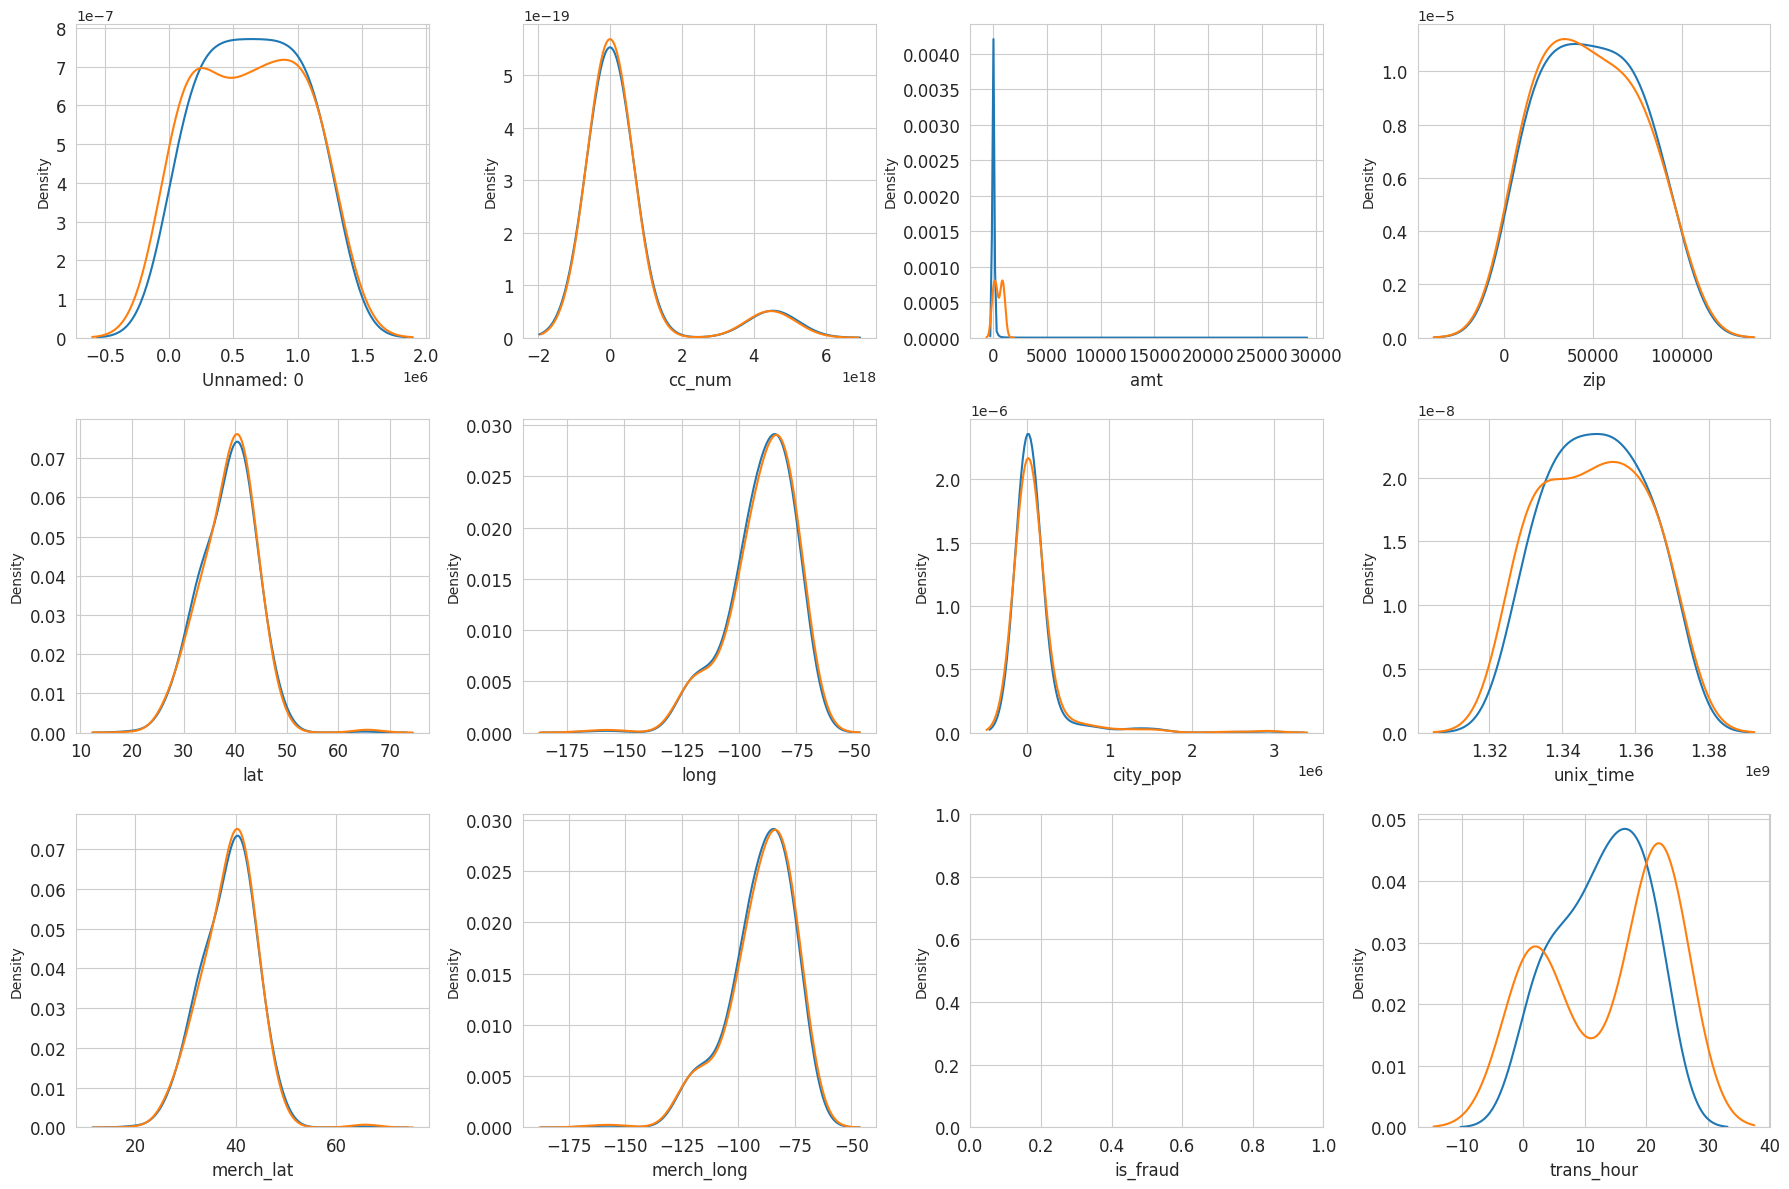

In [ ]:
t0 = train_data[train_data['is_fraud'] == 0]
t1 = train_data[train_data['is_fraud'] == 1]

numeric_columns = train_data.select_dtypes(include=['number']).columns
t0_numeric = t0[numeric_columns]
t1_numeric = t1[numeric_columns]

sns.set_style('whitegrid')

num_subplots = min(len(numeric_columns), 12)
fig, ax = plt.subplots(3, 4, figsize=(18, 12))

for i, feature in zip(range(1, num_subplots + 1), numeric_columns[:num_subplots]):
    plt.subplot(3, 4, i)
    sns.kdeplot(data=t0_numeric, x=feature, bw=0.5, label="is_fraud = 0")
    sns.kdeplot(data=t1_numeric, x=feature, bw=0.5, label="is_fraud = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


### **Data Preprocessing**

In [ ]:
# Separate features and target
selected_columns = ['gender', 'category', 'state', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_data[selected_columns]
y = train_data["is_fraud"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### **OneHot Encoding**

In [ ]:
# Separate categorical and numerical features

categorical_cols = ['gender', 'category', 'state']
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']

In [ ]:
train_data[categorical_cols].head()

,gender,category,state
0,F,misc_net,NC
1,F,grocery_pos,WA
2,M,entertainment,ID
3,M,gas_transport,MT
4,M,misc_pos,VA


In [ ]:
test_data[categorical_cols].head()

,gender,category,state
0,M,personal_care,SC
1,F,personal_care,UT
2,F,health_fitness,NY
3,M,misc_pos,FL
4,M,travel,MI


In [ ]:
train_data[numerical_cols].head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,4.970000,36.078800,-81.178100,3495,1325376018,36.011293,-82.048315
1,107.230000,48.887800,-118.210500,149,1325376044,49.159047,-118.186462
2,220.110000,42.180800,-112.262000,4154,1325376051,43.150704,-112.154481
3,45.000000,46.230600,-112.113800,1939,1325376076,47.034331,-112.561071
4,41.960000,38.420700,-79.462900,99,1325376186,38.674999,-78.632459


In [ ]:
test_data[numerical_cols].head()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
0,2.860000,33.965900,-80.935500,333497,1371816865,33.986391,-81.200714
1,29.840000,40.320700,-110.436000,302,1371816873,39.450498,-109.960431
2,41.280000,40.672900,-73.536500,34496,1371816893,40.495810,-74.196111
3,60.050000,28.569700,-80.819100,54767,1371816915,28.812398,-80.883061
4,3.190000,44.252900,-85.017000,1126,1371816917,44.959148,-85.884734


In [ ]:
# OneHot Encoding- Encode categorical variables into numerical format
# One-hot encode categorical features

ohe = OneHotEncoder(handle_unknown="ignore")
X_train_ohe = ohe.fit_transform(X_train[categorical_cols]).toarray()
X_val_ohe = ohe.transform(X_val[categorical_cols]).toarray()
test_ohe = ohe.transform(test_data[categorical_cols]).toarray()

### **Feature Scaling**

In [ ]:
# Feature scaling- Transforming the numerical features into a standardized range
# Scale numerical features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_val_scaled = scaler.transform(X_val[numerical_cols])
X_test_scaled = scaler.transform(test_data[numerical_cols])

In [ ]:
# Concatenate encoded and scaled features

X_train_preprocessed = pd.concat([pd.DataFrame(X_train_ohe), pd.DataFrame(X_train_scaled)], axis=1,ignore_index=True)
X_val_preprocessed = pd.concat([pd.DataFrame(X_val_ohe), pd.DataFrame(X_val_scaled)], axis=1,ignore_index=True)
X_test_preprocessed = pd.concat([pd.DataFrame(test_ohe), pd.DataFrame(X_test_scaled)], axis=1,ignore_index=True)

### **SMOTE**

In [ ]:
# SMOTE: Generating synthetic data to balance the classes in imbalanced dataset

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

In [ ]:
# checking the size of data
print(len(y_train_resampled))
print(len(X_train_resampled))

2062708
2062708


In [ ]:
# Define target variables
test_target = test_data['is_fraud']

### **Predictive Models**

### **Logistic Regression**

In [ ]:
#  Initialize and train Logistic Regression model

log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

In [ ]:
# Make predictions on the validation set

log_predictions = log_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model

log_accuracy = accuracy_score(y_val, log_predictions)
log_precision = precision_score(y_val, log_predictions)
log_recall = recall_score(y_val, log_predictions)
log_f1 = f1_score(y_val, log_predictions)

print('Accuracy:', round(log_accuracy, 2))
print('Precision:', round(log_precision, 2))
print('Recall:', round(log_recall, 2))
print('F1 Score:', round(log_f1, 2))

Accuracy: 0.88
Precision: 0.04
Recall: 0.76
F1 Score: 0.07


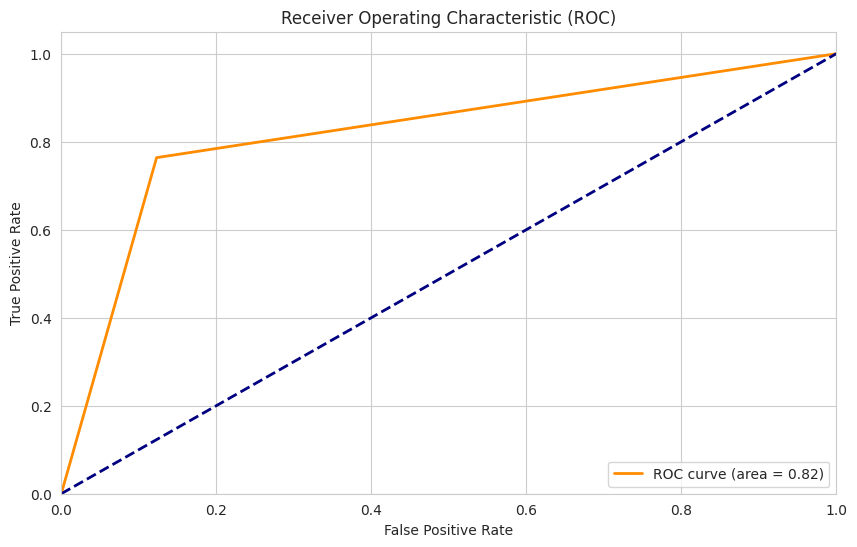

In [ ]:
# Calculate ROC curve and AUC

probs = log_model.predict_proba(X_val_preprocessed)[:, 1] # probs array contains the predicted probabilities for being in the positive class.
fpr, tpr, thresholds = roc_curve(y_val, log_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, log_predictions)
class_report = classification_report(y_val, log_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[226108  31707]
 [   359   1161]]


              precision    recall  f1-score   support

           0       1.00      0.88      0.93    257815
           1       0.04      0.76      0.07      1520

    accuracy                           0.88    259335
   macro avg       0.52      0.82      0.50    259335
weighted avg       0.99      0.88      0.93    259335



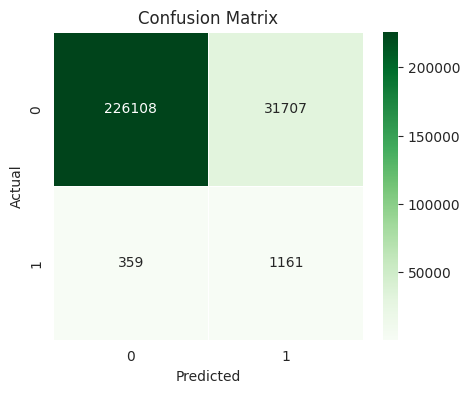

True Positives: 226108
False Positives: 31707
True Negatives: 1161
False Negatives: 359


In [ ]:
#PLotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Random Forest**

In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50,random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Make predictions on validation set
rf_predictions = rf_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model

rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions)
rf_recall = recall_score(y_val, rf_predictions)
rf_f1 = f1_score(y_val, rf_predictions)

print('Accuracy:', round(rf_accuracy, 2))
print('Precision:', round(rf_precision, 2))
print('Recall:', round(rf_recall, 2))
print('F1 Score:', round(rf_f1, 2))

Accuracy: 1.0
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


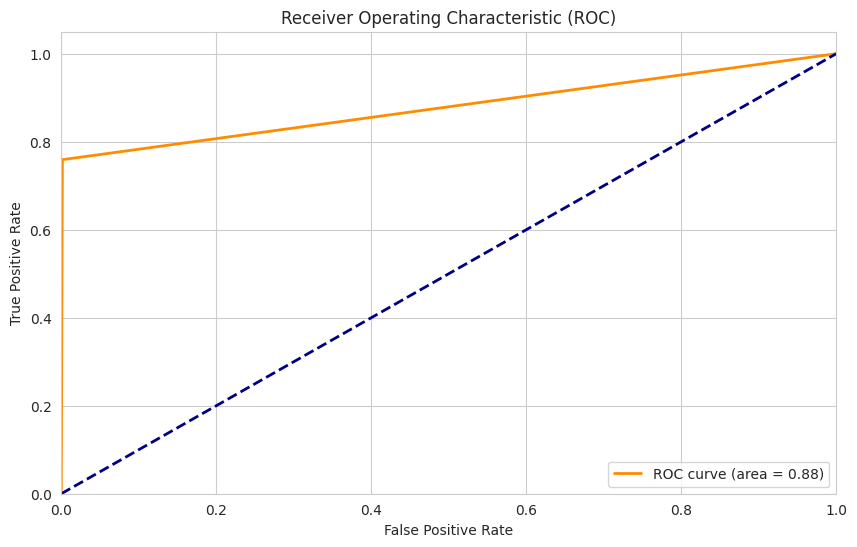

In [ ]:
# Calculate ROC curve and AUC

probs = rf_model.predict_proba(X_val_preprocessed)[:, 1] # probs array contains the predicted probabilities for being in the positive class.
fpr, tpr, thresholds = roc_curve(y_val, rf_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, rf_predictions)
class_report = classification_report(y_val, rf_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[257443    372]
 [   366   1154]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.76      0.76      0.76      1520

    accuracy                           1.00    259335
   macro avg       0.88      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



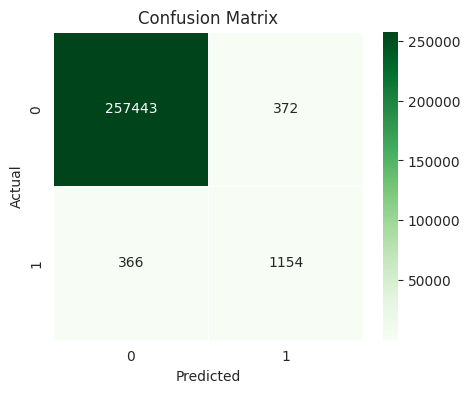

True Positives: 257443
False Positives: 372
True Negatives: 1154
False Negatives: 366


In [ ]:
#PLotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **SGD Classifier (Stochastic Gradient Descent)**

In [ ]:
# SGD is a variant of SVM which is well-suited for large datasets.

# Initialize and Train SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_resampled, y_train_resampled)

SGDClassifier(random_state=42)

In [ ]:
# Make predictions on validation set
sgd_predictions = sgd_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model

sgd_accuracy = accuracy_score(y_val, sgd_predictions)
sgd_precision = precision_score(y_val, sgd_predictions)
sgd_recall = recall_score(y_val, sgd_predictions)
sgd_f1 = f1_score(y_val, sgd_predictions)

print('Accuracy:', round(sgd_accuracy, 2))
print('Precision:', round(sgd_precision, 2))
print('Recall:', round(sgd_recall, 2))
print('F1 Score:', round(sgd_f1, 2))


Accuracy: 0.96
Precision: 0.1
Recall: 0.77
F1 Score: 0.18


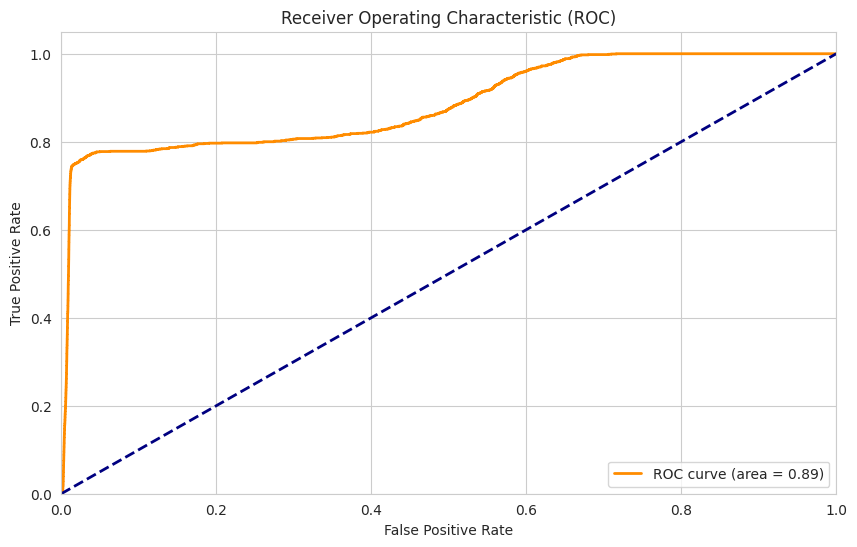

In [ ]:
# Calculate decision scores for the positive class
decision_scores = sgd_model.decision_function(X_val_preprocessed)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, sgd_predictions)
class_report = classification_report(y_val, sgd_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[247713  10102]
 [   345   1175]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    257815
           1       0.10      0.77      0.18      1520

    accuracy                           0.96    259335
   macro avg       0.55      0.87      0.58    259335
weighted avg       0.99      0.96      0.97    259335



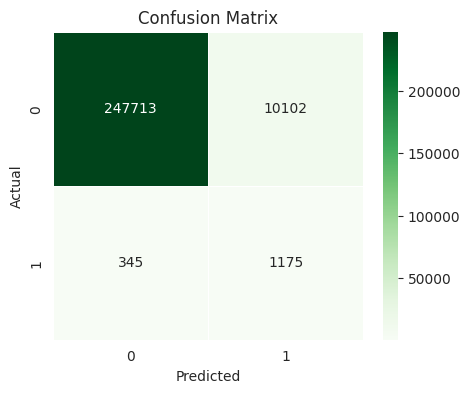

True Positives: 247713
False Positives: 10102
True Negatives: 1175
False Negatives: 345


In [ ]:
#Plotting the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Light GBM(Gradient Boosting Machine)**

In [ ]:
# Initialize LightGBM classifier
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'colsample_bytree': 0.9
}

In [ ]:
# Initialize and train lgb model
lgb_model = lgb.LGBMClassifier(**params)

# Train the classifier
lgb_model.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 1031354, number of negative: 1031354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.850081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14750
[LightGBM] [Info] Number of data points in the train set: 2062708, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(colsample_bytree=0.9, feature_fraction=0.9, learning_rate=0.05,
               metric='binary_logloss', objective='binary')

In [ ]:
# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_val_preprocessed)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9


In [ ]:
# Evaluate the performance of the model

lgb_accuracy = accuracy_score(y_val, lgb_predictions)
lgb_precision = precision_score(y_val, lgb_predictions)
lgb_recall = recall_score(y_val, lgb_predictions)
lgb_f1 = f1_score(y_val, lgb_predictions)

print('Accuracy:', round(lgb_accuracy, 2))
print('Precision:', round(lgb_precision, 2))
print('Recall:', round(lgb_recall, 2))
print('F1 Score:', round(lgb_f1, 2))


Accuracy: 0.98
Precision: 0.21
Recall: 0.94
F1 Score: 0.35


In [ ]:
# Calculate ROC curve and AUC
probs = lgb_model.predict_proba(X_val_preprocessed)[:, 1] # probs array contains the predicted probabilities for being in the positive class.
fpr, tpr, thresholds = roc_curve(y_val, lgb_predictions)
roc_auc = auc(fpr, tpr)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9


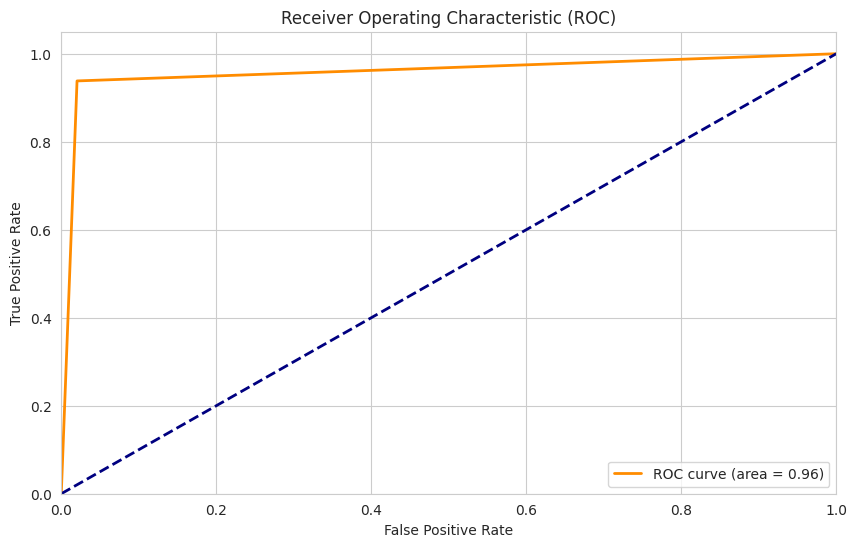

In [ ]:
# Plot ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, lgb_predictions)
class_report = classification_report(y_val, lgb_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[252571   5244]
 [    94   1426]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    257815
           1       0.21      0.94      0.35      1520

    accuracy                           0.98    259335
   macro avg       0.61      0.96      0.67    259335
weighted avg       1.00      0.98      0.99    259335



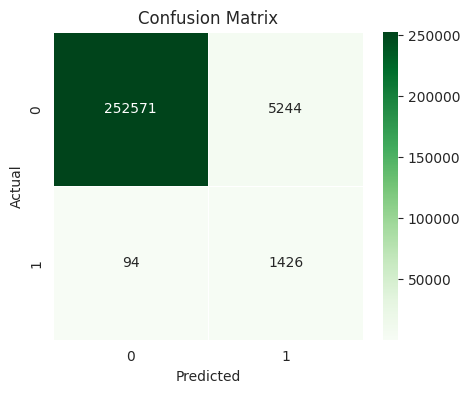

True Positives: 252571
False Positives: 5244
True Negatives: 1426
False Negatives: 94


In [ ]:
#PLotting the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **XG Boost**

In [ ]:
# Create a XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False  # To avoid warnings about label encoding
)


In [ ]:
# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on the validation set
xgb_predictions = xgb_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model

xgb_accuracy = accuracy_score(y_val, xgb_predictions)
xgb_precision = precision_score(y_val, xgb_predictions)
xgb_recall = recall_score(y_val, xgb_predictions)
xgb_f1 = f1_score(y_val, xgb_predictions)

print('Accuracy:', round(xgb_accuracy, 2))
print('Precision:', round(xgb_precision, 2))
print('Recall:', round(xgb_recall, 2))
print('F1 Score:', round(xgb_f1, 2))

Accuracy: 0.99
Precision: 0.35
Recall: 0.9
F1 Score: 0.5


In [ ]:
# Calculate ROC curve and AUC

probs = xgb_model.predict_proba(X_val_preprocessed)[:, 1] # probs array contains the predicted probabilities for being in the positive class.
fpr, tpr, thresholds = roc_curve(y_val, xgb_predictions)
roc_auc = auc(fpr, tpr)

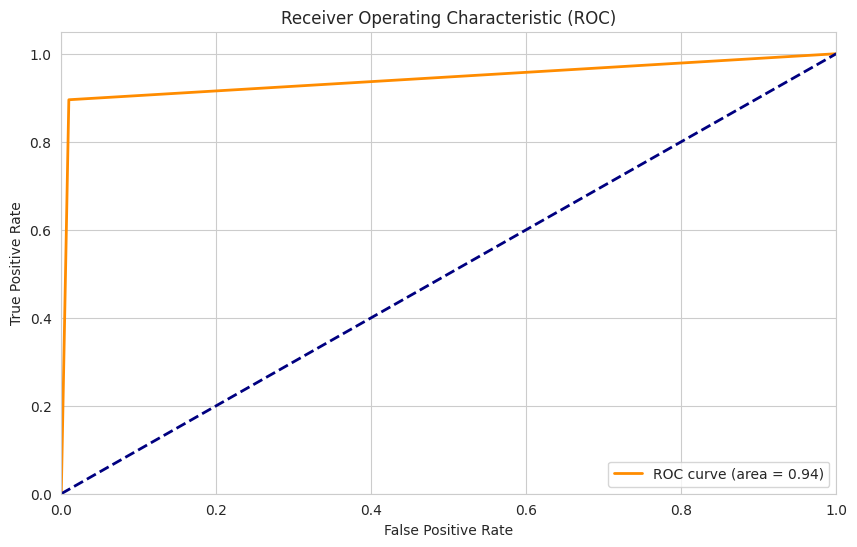

In [ ]:
# Plot ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, xgb_predictions)
class_report = classification_report(y_val, xgb_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[255299   2516]
 [   159   1361]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.35      0.90      0.50      1520

    accuracy                           0.99    259335
   macro avg       0.68      0.94      0.75    259335
weighted avg       1.00      0.99      0.99    259335



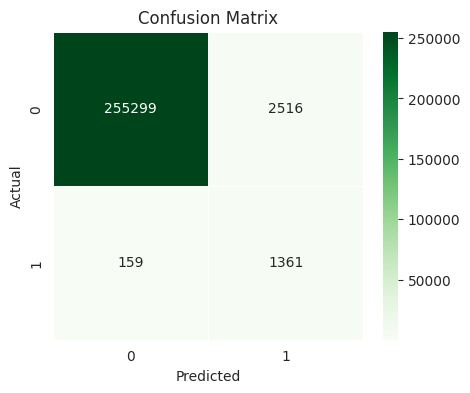

True Positives: 255299
False Positives: 2516
True Negatives: 1361
False Negatives: 159


In [ ]:
#PLotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

##### **To enhance the efficiency of the SVM and KNN model during the initial selection process, a small subset of the preprocessed training datase is employed. This is necessary as these models are taking too long to execute.**

In [ ]:
# considering the first 10000 samples for training
subset_size_train = 10000

In [ ]:
# Subset of the training data
X_train_subset = X_train_resampled[:subset_size_train]
y_train_subset = y_train_resampled[:subset_size_train]

### **SVM (Support Vector Machines)**

In [ ]:
# Initialize and train SVM model
svm_model = SVC(kernel='poly')
svm_model.fit(X_train_subset, y_train_subset)

SVC(kernel='poly')

In [ ]:
# Make predictions on validation set
svm_predictions = svm_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model
svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_precision = precision_score(y_val, svm_predictions)
svm_recall = recall_score(y_val, svm_predictions)
svm_f1 = f1_score(y_val, svm_predictions)

print('Accuracy:', round(svm_accuracy, 2))
print('Precision:', round(svm_precision, 2))
print('Recall:', round(svm_recall, 2))
print('F1 Score:', round(svm_f1, 2))

Accuracy: 0.99
Precision: 0.44
Recall: 0.13
F1 Score: 0.21


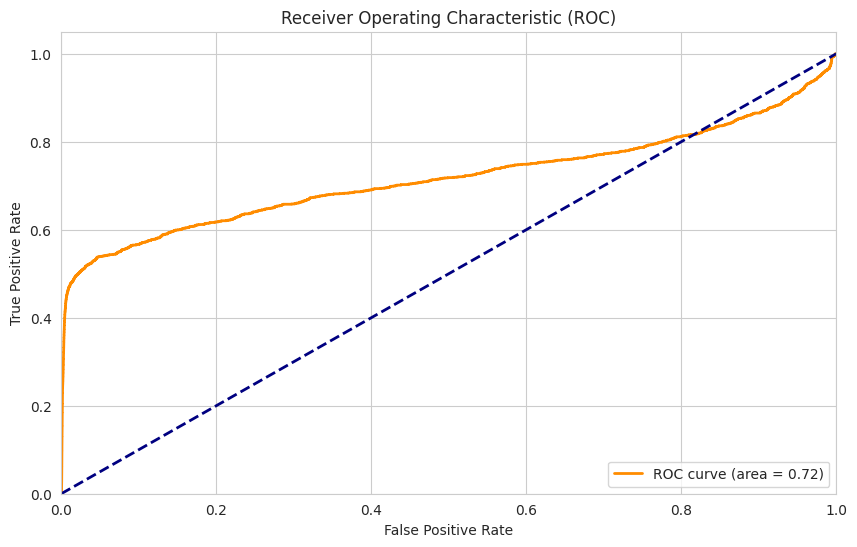

In [ ]:
# Calculate decision scores for the positive class
decision_scores = svm_model.decision_function(X_val_preprocessed)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, svm_predictions)
class_report = classification_report(y_val, svm_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[257560    255]
 [  1316    204]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.44      0.13      0.21      1520

    accuracy                           0.99    259335
   macro avg       0.72      0.57      0.60    259335
weighted avg       0.99      0.99      0.99    259335



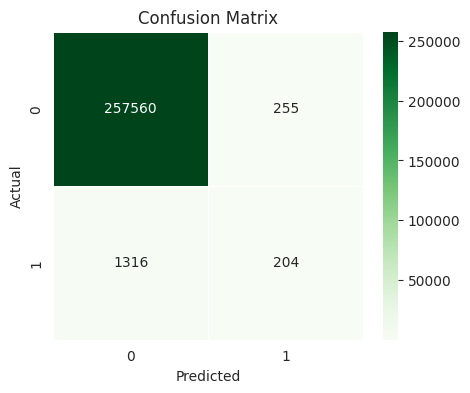

True Positives: 257560
False Positives: 255
True Negatives: 204
False Negatives: 1316


In [ ]:
#PLotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **KNN (K-Nearest Neighbors)**

In [ ]:
#Initialize and train KNN model

knn_model = KNeighborsClassifier(weights='distance')
knn_model.fit(X_train_subset, y_train_subset)

KNeighborsClassifier(weights='distance')

In [ ]:
# Make predictions on validation set

knn_predictions = knn_model.predict(X_val_preprocessed)

In [ ]:
# Evaluate the performance of the model

knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_precision = precision_score(y_val, knn_predictions)
knn_recall = recall_score(y_val, knn_predictions)
knn_f1 = f1_score(y_val, knn_predictions)

print('Accuracy:', round(knn_accuracy, 2))
print('Precision:', round(knn_precision, 2))
print('Recall:', round(knn_recall, 2))
print('F1 Score:', round(knn_f1, 2))


Accuracy: 0.99
Precision: 0.6
Recall: 0.13
F1 Score: 0.22


In [ ]:
# Calculate ROC curve and AUC

probs = knn_model.predict_proba(X_val_preprocessed)[:, 1] # probs array contains the predicted probabilities for being in the positive class.
fpr, tpr, thresholds = roc_curve(y_val, knn_predictions)
roc_auc = auc(fpr, tpr)

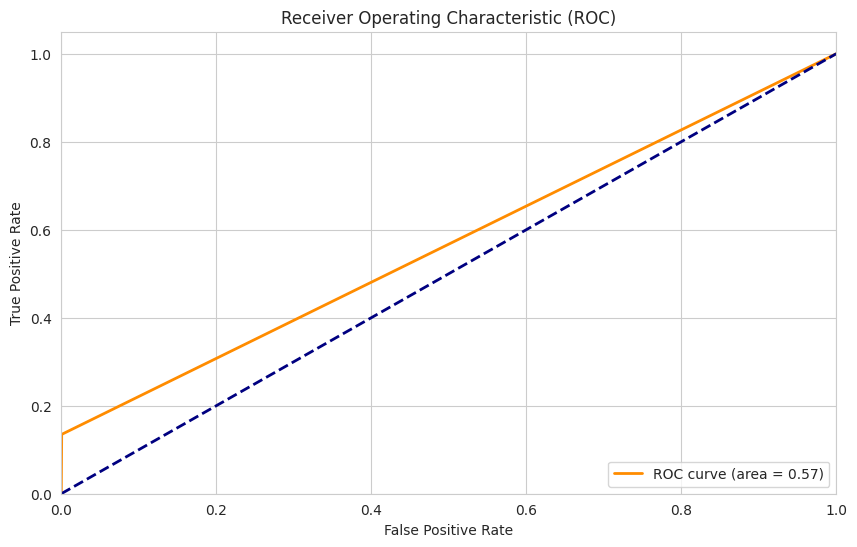

In [ ]:
# Plot ROC curve

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_val, knn_predictions)
class_report = classification_report(y_val, knn_predictions)
print(conf_matrix)
print("\n")
print(class_report)

[[257676    139]
 [  1315    205]]


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.60      0.13      0.22      1520

    accuracy                           0.99    259335
   macro avg       0.80      0.57      0.61    259335
weighted avg       0.99      0.99      0.99    259335



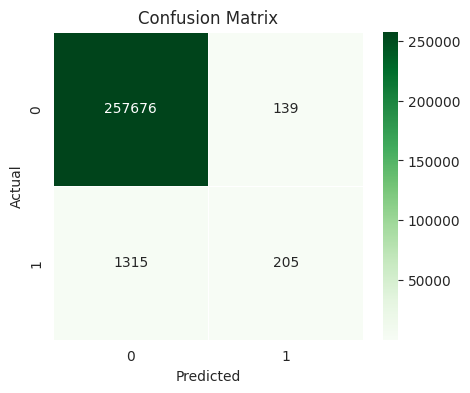

True Positives: 257676
False Positives: 139
True Negatives: 205
False Negatives: 1315


In [ ]:
# Plotting the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Model Evaluation on Test data**

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Define model names and instances
model_names = ['Logistic Regression', 'Random Forest', 'Stochastic Gradient Descent (SGD)', 'Light GBM', 'XGBoost','Support Vector Machine (SVM)','K-Nearest Neighbors (KNN)']
model_instances = [log_model,rf_model, sgd_model, lgb_model,xgb_model,svm_model, knn_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'ROC Score': roc_scores,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})



[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9


In [108]:
# Print the comparison table
# results_df()
results_df = results_df.sort_values(by='ROC Score', ascending=False)
results_df

,Model,ROC Score,Accuracy,F1 Score,Precision Score,Recall Score
3,Light GBM,0.947122,0.981158,0.272190,0.159941,0.912821
4,XGBoost,0.891415,0.993227,0.473419,0.338197,0.788811
2,Stochastic Gradient Descent (SGD),0.853045,0.962580,0.132855,0.072953,0.742657
0,Logistic Regression,0.826396,0.928917,0.072810,0.038335,0.723077
1,Random Forest,0.688864,0.997240,0.513942,0.802176,0.378089
6,K-Nearest Neighbors (KNN),0.635047,0.995957,0.341249,0.459716,0.271329
5,Support Vector Machine (SVM),0.628823,0.995123,0.291318,0.331745,0.259674


- Using ROC Score as evaluation metric as the data is imbalanced

- Overall Performance: Light GBM is the best performing model with the highest ROC score of 94.8 %.

- Model Specificity: KNN and SVM have lower ROC scores and F1 scores, suggesting they may not be as effective in distinguishing between positive and negative cases

**NOTE: When to use each of the classfication evaluation metrics**
- Accuracy:

  Use Case: Accuracy is suitable when class distribution is balanced, and the cost of misclassifying both classes is similar.

  Considerations: Not recommended for highly imbalanced datasets, as it can be misleading when one class dominates.

- F1 Score:

  Use Case: F1 score is appropriate when dealing with imbalanced datasets, especially when there is a significant cost difference between false positives and false negatives.

  Considerations: It balances precision and recall, providing a more comprehensive assessment in scenarios where class distribution is skewed.

- ROC-AUC Score:

  Use Case: ROC-AUC is beneficial when evaluating the performance of a classifier across different probability thresholds. It provides insights into the trade-off between true positive rate and false positive rate.

  Considerations: Useful when setting a decision threshold is crucial.

- Precision:

  Use Case: Precision is valuable when the focus is on minimizing false positives. It is suitable when the cost of false positives is high.

  Considerations: Precision doesn't consider false negatives, so it might not be ideal when false negatives have significant consequences.

- Recall (Sensitivity or True Positive Rate):

  Use Case: Recall is important when the goal is to capture as many positive instances as possible. It is suitable when the cost of false negatives is high.

  Considerations: Not optimal when false positives have severe consequences.

In practice, the choice of metric depends on the specific goals and constraints of the classification problem. It's often beneficial to consider a combination of metrics to obtain a more comprehensive understanding of the model's performance. Additionally, domain knowledge and the consequences of false positives and false negatives play a crucial role in selecting the most appropriate evaluation metrics.



